In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from textblob import TextBlob
from IPython.display import HTML

In [2]:
df = pd.read_csv('data.csv')
print(df.shape)
print(df.columns)

(732, 15)
Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'date', 'day', 'Cleaned_Text',
       'Polarity', 'Sentiment'],
      dtype='object')


In [3]:
df_model = df[['Cleaned_Text', 'Sentiment']].copy()
df_model['Sentiment'] = df_model['Sentiment'].map({'Negative': 0, 'Positive': 1, 'Neutral': 2}).dropna().astype(int)
df_model

,Cleaned_Text,Sentiment
0,enjoying beautiful day park,1
1,traffic terrible morning,0
2,finished amazing workout,1
3,excited upcoming weekend getaway,1
4,trying new recipe dinner tonight,1
...,...,...
727,collaborating science project received recogni...,1
728,attending surprise birthday party organized fr...,1
729,successfully fundraising school charity initia...,1
730,participating multicultural festival celebrati...,1


# Splitting data into training and testing

In [5]:
X = df['Cleaned_Text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (585,)
y_train: (585,)
X_test: (147,)
y_test: (147,)


In [6]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('log_reg', LogisticRegression(C=1.0, solver='lbfgs', max_iter=10000))
])

In [7]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(stop_words='english')),
                ('log_reg', LogisticRegression(max_iter=10000))])

In [8]:
y_pred= pipeline.predict(X_test)

In [9]:
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Model Accuracy

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 0.7074829931972789
Accuracy: 70.75%


In [12]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.30      0.43        20
     Neutral       0.66      0.87      0.75        68
    Positive       0.80      0.66      0.72        59

    accuracy                           0.71       147
   macro avg       0.73      0.61      0.63       147
weighted avg       0.72      0.71      0.69       147



In [13]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 6 13  1]
 [ 0 59  9]
 [ 2 18 39]]


In [14]:
print("F1-score:", f1_score(y_test, y_pred, average='macro'))

F1-score: 0.6325430312772085


In [15]:
print("AUC:", roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr'))

AUC: 0.8097614226115843


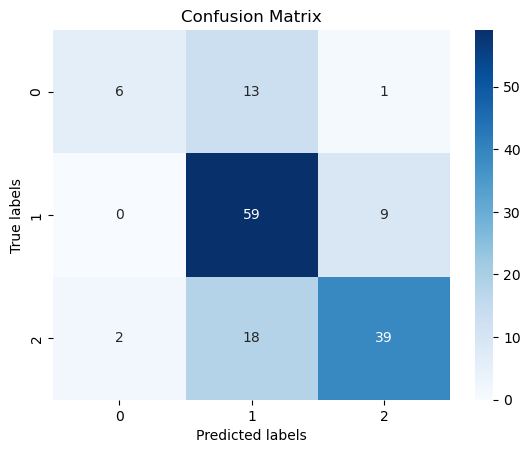

In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

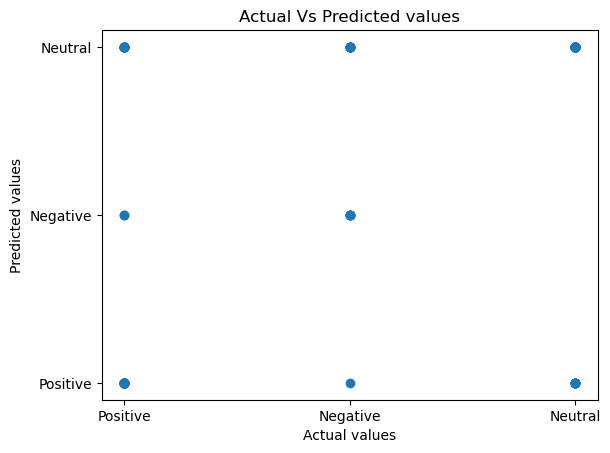

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual Vs Predicted values')
plt.show()

In [18]:
def sentiment_analysis(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'

text = input("Enter the text: ")
sentiment = sentiment_analysis(text)
print("Sentiment:", sentiment)

Enter the text:  "I am loving the vibes"


Sentiment: Positive
